In [1]:
from utils import GPR, generate_sample
# import kernels
from sklearn.gaussian_process.kernels import ConstantKernel, ExpSineSquared, RBF
import numpy as np
import matplotlib.pyplot as plt

In [2]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)
X, y = generate_sample(1000, 2, [-5, 5], [-5, 5], target_func)

In [3]:
gpr = GPR(kernel=ConstantKernel(1.0)+ConstantKernel(1.0), n_optim_steps=50)

In [4]:
gpr.fit(X, y)

2022-07-29 19:18:38,419 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-1.06e+4
2022-07-29 19:18:46,545 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -10585.002038600267, best pos: [-4.40351213  9.92088287]


GPR(kernel=1**2 + 1**2, n_optim_steps=50)

In [5]:
fun = gpr.model.log_marginal_likelihood
hist = gpr.optimizer.pos_history

In [12]:
# visualize the likelihood for each point in the grid, given by the function fun
n = 100
x_grid = np.linspace(-10, 10, n)
y_grid = np.linspace(-10, 10, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid = X_grid.reshape(-1, 2)
z = np.asarray([fun(X) for X in X_grid])
z = z.reshape(n, n)

In [13]:
X_grid.shape

(10000, 2)

In [14]:
def animate(i):
    ax = plt.axes()
    ax.pcolormesh(x_grid, y_grid, z)
    for pos in hist[i]:
        ax.scatter(pos[0], pos[1], c='gray')
    return ax,

In [15]:
z

array([[-2.42555717e+07, -1.61899180e+07, -1.08051493e+07, ...,
         1.05817715e+04,  1.05816151e+04,            -inf],
       [-2.42555717e+07, -1.61899180e+07, -1.08051493e+07, ...,
         1.05817715e+04,  1.05816151e+04,            -inf],
       [-2.42555717e+07, -1.61899180e+07, -1.08051493e+07, ...,
         1.05817715e+04,  1.05816151e+04,            -inf],
       ...,
       [ 1.05718282e+04,  1.05718282e+04,  1.05718282e+04, ...,
                   -inf,            -inf,            -inf],
       [           -inf,            -inf,            -inf, ...,
                   -inf,            -inf,            -inf],
       [           -inf,            -inf,            -inf, ...,
                   -inf,            -inf,            -inf]])

(<AxesSubplot:>,)

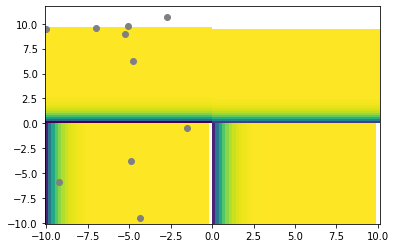

In [16]:
animate(5)

In [17]:
from matplotlib.animation import FuncAnimation 
fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(hist), interval=500)
anim.save("blockbuster.mp4")

2022-07-29 19:27:55,073 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-07-29 19:27:55,074 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y blockbuster.mp4
